#Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/Colab Notebooks/VGU AI/Logistic Regression

/content/drive/MyDrive/Colab Notebooks/VGU AI/Logistic Regression


In [4]:
#load
dataset_path='titanic_modified_dataset.csv'
df=pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)

In [5]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [6]:
#split into X,y
dataset_arr=df.to_numpy().astype(np.float64)
X,y=dataset_arr[:,:-1],dataset_arr[:,-1]

In [7]:
#add bias (W_0) into X
bias=np.ones((X.shape[0],1))
X=np.concatenate((bias,X),axis=1)
X

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [8]:
#tỉ lệ train,valid,test 7:2:1
X_train,X_val,y_train,y_val=train_test_split(
    X,y,
    test_size=0.2,
    random_state=2,
    shuffle=True
)
X_train,X_test,y_train,y_test=train_test_split(
    X_train,y_train,
    test_size=0.125,
    random_state=2,
    shuffle=True
)

In [9]:
#standardize data
normalizer=StandardScaler()
X_train[:,1:]=normalizer.fit_transform(X_train[:,1:]) #không standardize bias
X_val[:,1:]=normalizer.transform(X_val[:,1:])
X_test[:,1:]=normalizer.transform(X_test[:,1:])

#Define

In [10]:
#sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [11]:
#predict
def predict(X,W):
    dot_product=np.dot(X,W)
    y_hat=sigmoid(dot_product)
    return y_hat

In [12]:
#loss
def compute_loss(y_hat,y):
    y_hat=np.clip(y_hat,1e-7,1-1e-7) #set limit to values (if value is outside of the interval, will be set to the edge)
    tmp=-y*np.log(y_hat)-(1-y)*np.log(1-y_hat)
    return tmp.mean()

In [13]:
#gradient
def compute_gradient(X,y,y_hat):
    return np.dot(
        X.T,(y_hat-y)
    )/y.size
# X.T dùng để xoay/đổi 2 chiều x và y cho nhau để từ shape (m,11) => (11,m)

In [14]:
#update
def update_W(W,gradient,lr):
    return W-gradient*lr

In [15]:
#accuracy
def compute_accuracy(X,y,W):
    y_hat=predict(X,W).round()
    acc=(y_hat==y).mean()
    return acc

#Model

In [16]:
#init
lr=0.01
epochs=100
batch_size=16

np.random.seed(2)
W=np.random.uniform(size=X_train.shape[1])

In [17]:
train_accs=[]
train_losses=[]
val_accs=[]
val_losses=[]
for epoch in range(epochs):
    train_batch_accs=[]
    train_batch_losses=[]
    val_batch_accs=[]
    val_batch_losses=[]
    for i in range(0,X_train.shape[0],batch_size):
        X_batch=X_train[i:i+batch_size]
        y_batch=y_train[i:i+batch_size]
        y_hat=predict(X_batch,W)
        train_loss=compute_loss(y_hat,y_batch)
        gradient=compute_gradient(X_batch,y_batch,y_hat)
        W=update_W(W,gradient,lr)
        train_batch_losses.append(train_loss)

        train_acc=compute_accuracy(X_batch,y_batch,W)
        train_batch_accs.append(train_acc)

        y_val_hat=predict(X_val,W)
        val_loss=compute_loss(y_val_hat,y_val)
        val_batch_losses.append(val_loss)

        val_acc=compute_accuracy(X_val,y_val,W)
        val_batch_accs.append(val_acc)

    train_batch_loss=sum(train_batch_losses)/len(train_batch_losses)
    train_batch_acc=sum(train_batch_accs)/len(train_batch_accs)
    val_batch_loss=sum(val_batch_losses)/len(val_batch_losses)
    val_batch_acc=sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')




EPOCH 1:	Training loss : 0.703	Validation loss : 0.599

EPOCH 2:	Training loss : 0.670	Validation loss : 0.582

EPOCH 3:	Training loss : 0.640	Validation loss : 0.567

EPOCH 4:	Training loss : 0.614	Validation loss : 0.555

EPOCH 5:	Training loss : 0.592	Validation loss : 0.544

EPOCH 6:	Training loss : 0.572	Validation loss : 0.535

EPOCH 7:	Training loss : 0.554	Validation loss : 0.528

EPOCH 8:	Training loss : 0.539	Validation loss : 0.522

EPOCH 9:	Training loss : 0.526	Validation loss : 0.517

EPOCH 10:	Training loss : 0.514	Validation loss : 0.513

EPOCH 11:	Training loss : 0.504	Validation loss : 0.509

EPOCH 12:	Training loss : 0.495	Validation loss : 0.507

EPOCH 13:	Training loss : 0.487	Validation loss : 0.505

EPOCH 14:	Training loss : 0.480	Validation loss : 0.503

EPOCH 15:	Training loss : 0.474	Validation loss : 0.502

EPOCH 16:	Training loss : 0.468	Validation loss : 0.501

EPOCH 17:	Training loss : 0.463	Validation loss : 0.500

EPOCH 18:	Training loss : 0.459	Validat

#Plot

Text(0.5, 1.0, 'Validation Accuracy')

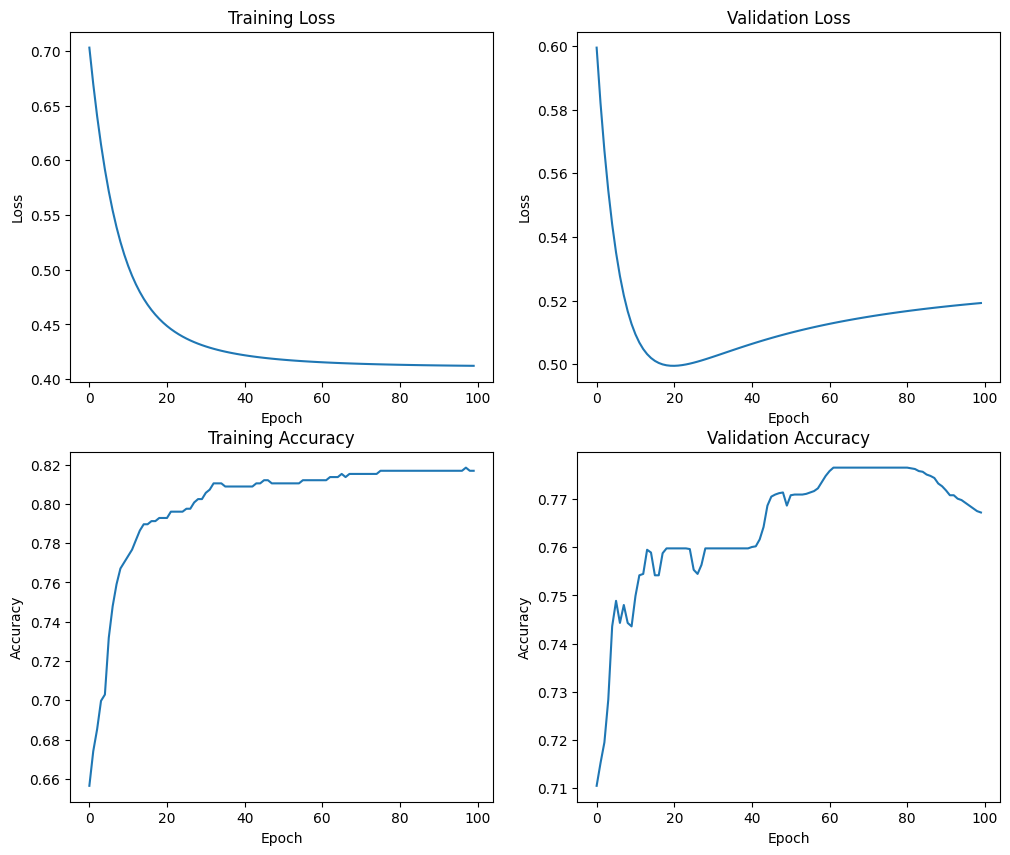

In [18]:
fig,ax=plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(train_losses)
ax[0,0].set(xlabel='Epoch',ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_losses)
ax[0,1].set(xlabel='Epoch',ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_accs)
ax[1,0].set(xlabel='Epoch',ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_accs)
ax[1,1].set(xlabel='Epoch',ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

#Evaluation

In [19]:
val_set_acc=compute_accuracy(X_val,y_val,W)
test_set_acc=compute_accuracy(X_test,y_test,W)
print('Evaluation:')
print('Validation set accuracy:',val_set_acc)
print('Test set accuracy:',test_set_acc)

Evaluation:
Validation set accuracy: 0.770949720670391
Test set accuracy: 0.7752808988764045


In [37]:
w=W
w=np.array([w])

array([[-0.8299791 , -0.83364624,  1.257447  , -0.48575828, -0.41053389,
        -0.02945006,  0.17692707,  0.08388393,  0.28230179]])

In [38]:
w

array([[-0.8299791 , -0.83364624,  1.257447  , -0.48575828, -0.41053389,
        -0.02945006,  0.17692707,  0.08388393,  0.28230179]])

In [39]:
W

array([-0.8299791 , -0.83364624,  1.257447  , -0.48575828, -0.41053389,
       -0.02945006,  0.17692707,  0.08388393,  0.28230179])

In [41]:
np.dot(X,W)

array([-1.31454127e+01, -6.29739571e+00, -1.27364356e+01, -8.14112283e+00,
       -1.89081948e+01, -1.52678797e+01, -1.87186924e+01, -9.87842701e-01,
       -1.29957606e+01, -2.76445012e+00, -9.37202218e-01, -2.33181415e+01,
       -1.16218206e+01, -1.72998809e+01, -6.91986261e+00, -2.48433953e+01,
        1.93654202e-01, -1.37984516e+01, -1.40755224e+01, -1.40302190e+01,
       -1.48987076e+01, -1.67130013e+01, -7.20689079e+00, -8.98394622e+00,
       -2.92724719e+00, -1.52544695e+01, -1.55699678e+01,  3.43482855e+01,
       -1.35482875e+01, -1.55351690e+01, -1.49763056e+01,  1.18717377e+01,
       -1.35711465e+01, -3.26995841e+01, -1.05326817e+00, -1.32757994e+01,
       -1.55692247e+01, -1.21075789e+01, -7.88889683e+00, -6.64717211e+00,
       -1.99556503e+01, -1.07680618e+01, -1.54512851e+01,  4.83844020e+00,
       -9.17646299e+00, -1.55078868e+01, -1.44325462e+01, -1.35711465e+01,
       -1.38336962e+01, -7.79605015e+00, -5.34112875e-01, -1.21518106e+01,
       -1.06772097e+01, -

In [34]:
np.array([X[0]])

array([[ 1.  ,  3.  ,  0.  , 22.  ,  1.  ,  0.  ,  7.25,  0.  ,  0.  ]])